<a href="https://colab.research.google.com/github/siddhengineer/Digit-Recognition-CNN/blob/main/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [2]:
print("Training images shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

Training images shape: (60000, 28, 28)
Training labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


In [3]:
print("Sample training label:", train_labels[0])
print("Sample training image shape:", train_images[0].shape)

Sample training label: 5
Sample training image shape: (28, 28)


In [4]:
import numpy as np

labels = np.unique(train_labels)
print("labels are:", labels)

labels are: [0 1 2 3 4 5 6 7 8 9]


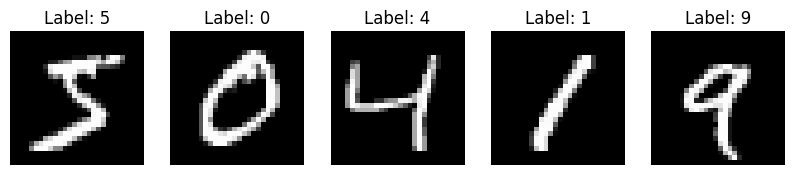

In [5]:
import matplotlib.pyplot as plt

def plot_sample_images(images, labels, num_samples=5):
    plt.figure(figsize=(10, 2))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f"Label: {labels[i]}")
        plt.axis('off')
    plt.show()

plot_sample_images(train_images, train_labels)

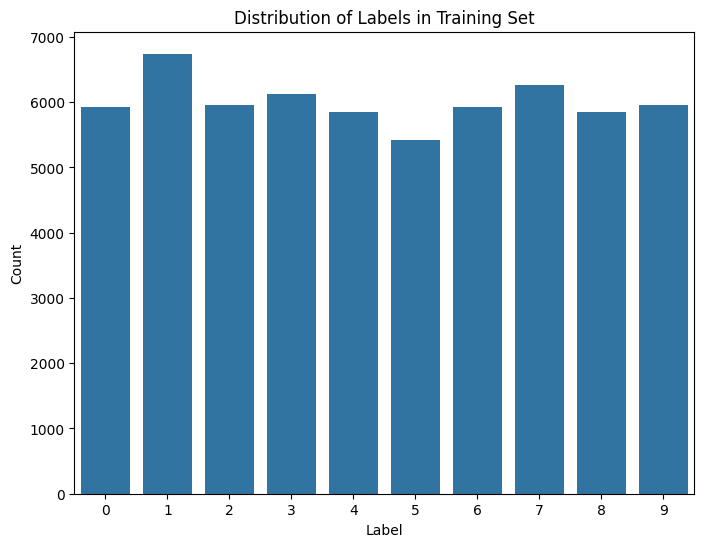

In [6]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x=train_labels)
plt.title("Distribution of Labels in Training Set")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

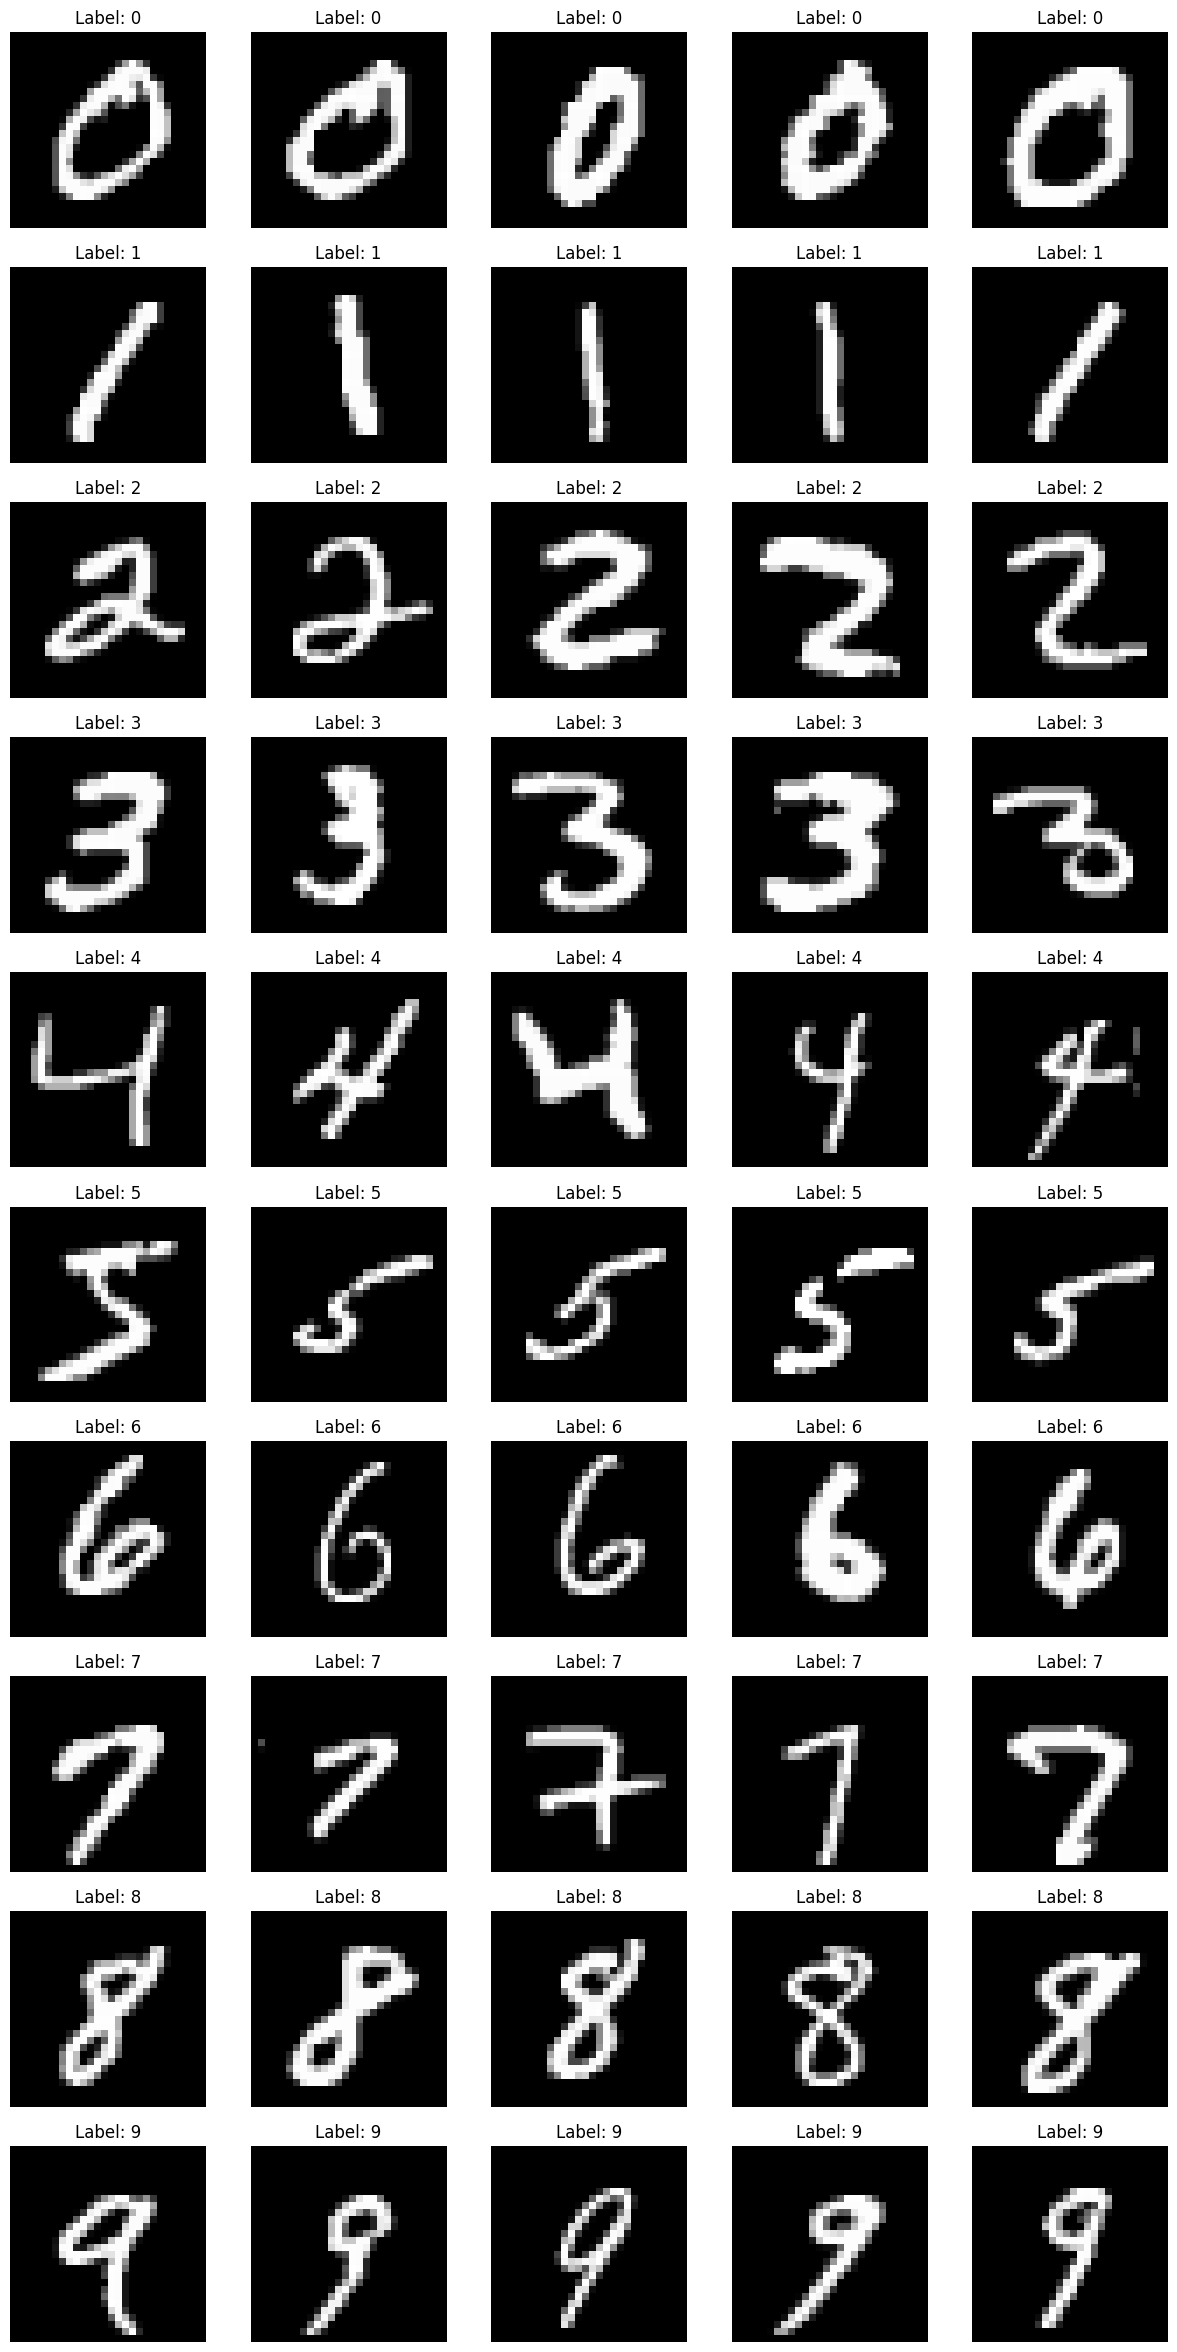

In [7]:
def plot_images_by_class(images, labels, num_classes=10, num_samples=5):
    plt.figure(figsize=(15, num_classes * 3))
    for label in range(num_classes):
        class_images = images[labels == label]
        num_class_samples = min(num_samples, len(class_images))
        for i in range(num_class_samples):
            plt.subplot(num_classes, num_samples, label * num_samples + i + 1)
            plt.imshow(class_images[i], cmap='gray')
            plt.title(f"Label: {label}")
            plt.axis('off')
    plt.show()

plot_images_by_class(train_images, train_labels)

In [8]:
from tensorflow.keras.utils import to_categorical

train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32') / 255
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1).astype('float32') / 255
train_labels_categorical = to_categorical(train_labels)
test_labels_categorical = to_categorical(test_labels)

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input


# Define the CNN model
model_cnn = Sequential([
    Input(shape=(28, 28, 1)),  # Input layer for 28x28 grayscale images
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),  # Flatten the 2D output to 1D for the dense layers

    Dense(128, activation='relu'),
    Dropout(0.5),

    Dense(10, activation='softmax')  # Output layer with softmax for multi-class classification
])

# Compile the model
model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model_cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 241,546 (943.54 KB)

 Trainable params: 241,546 (943.54 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
history = model_cnn.fit(train_images, train_labels_categorical, epochs=30, batch_size=128, validation_data=(test_images, test_labels_categorical), verbose=1)

Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 19ms/step - accuracy: 0.7334 - loss: 0.7936 - val_accuracy: 0.9819 - val_loss: 0.0579
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9627 - loss: 0.1259 - val_accuracy: 0.9883 - val_loss: 0.0359
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9760 - loss: 0.0841 - val_accuracy: 0.9892 - val_loss: 0.0316
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9798 - loss: 0.0699 - val_accuracy: 0.9914 - val_loss: 0.0258
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9822 - loss: 0.0581 - val_accuracy: 0.9924 - val_loss: 0.0241
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9848 - loss: 0.0540 - val_accuracy: 0.9925 - val_loss: 0.0223
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9859 - loss: 0.0478 - val_accuracy: 0.9926 - val_loss: 0.0207
Epoch 8/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9861 - loss: 0.0447 - val_accuracy: 

In [12]:
test_loss, test_accuracy = model_cnn.evaluate(test_images, test_labels_categorical)
print('Test accuracy:', test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9932 - loss: 0.0248
Test accuracy: 0.9940000176429749


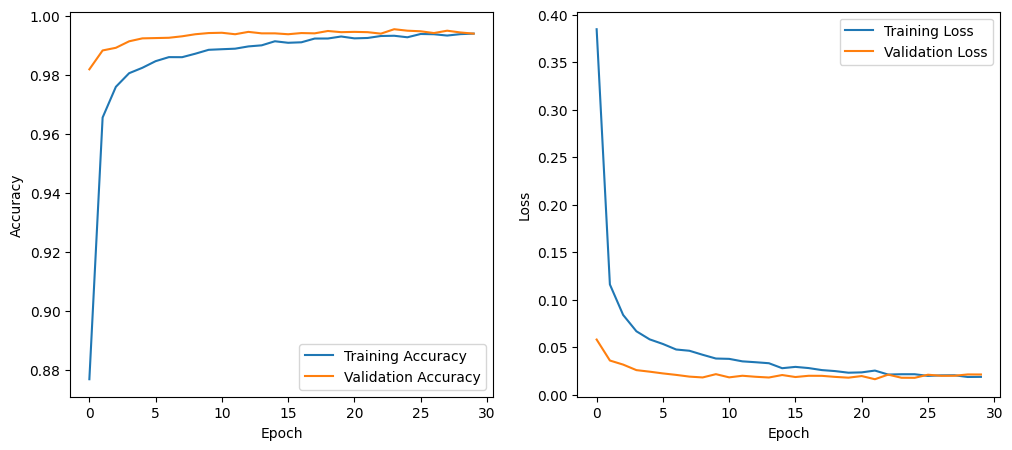

In [13]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 776ms/step


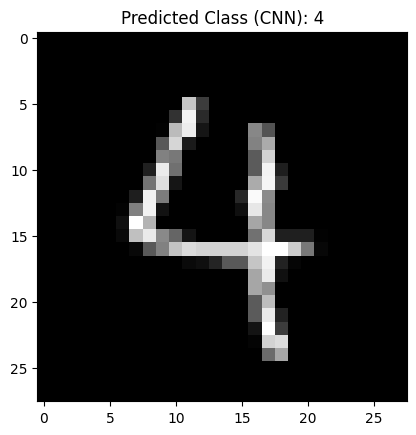

In [14]:
sample_image_cnn = test_images[24]
sample_image_cnn = np.expand_dims(sample_image_cnn, axis=0)
prediction_cnn = model_cnn.predict(sample_image_cnn)
predicted_class_cnn = np.argmax(prediction_cnn[0])

plt.imshow(sample_image_cnn[0], cmap='gray')
plt.title(f"Predicted Class (CNN): {predicted_class_cnn}")
plt.show()

In [15]:
from sklearn.metrics import confusion_matrix

# After you've already made predictions on the test set
y_pred = model_cnn.predict(test_images)  # Get predicted probabilities

# Convert predicted probabilities to class labels
y_pred_labels = [np.argmax(i) for i in y_pred]

# Print the predicted labels for the first test image (just an example)
label_for_first_test_image = np.argmax(y_pred[0])
print('Predicted label for the first test image:', label_for_first_test_image)

# Convert predictions for all test images to class labels
print('Predicted labels for all test images:', y_pred_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
Predicted label for the first test image: 7
Predicted labels for all test images: [7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 4, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 

In [16]:
# Generate a confusion matrix
conf_mat = confusion_matrix(np.argmax(test_labels_categorical, axis=1), y_pred_labels)
print('Confusion Matrix:')
print(conf_mat)

Confusion Matrix:
[[ 978    0    0    0    0    0    1    1    0    0]
 [   0 1132    1    0    0    0    0    2    0    0]
 [   1    0 1029    0    0    0    0    2    0    0]
 [   0    0    1 1005    0    1    0    2    0    1]
 [   0    0    0    0  977    0    0    0    0    5]
 [   1    0    0    3    0  887    1    0    0    0]
 [   4    2    0    0    1    1  949    0    1    0]
 [   0    2    5    0    0    0    0 1021    0    0]
 [   3    0    1    1    0    1    0    0  966    2]
 [   0    0    0    0    8    0    0    4    1  996]]
